In [1]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pytesseract as ts

import utils

%load_ext autoreload

In [2]:
%autoreload 1
%aimport utils

2554 606


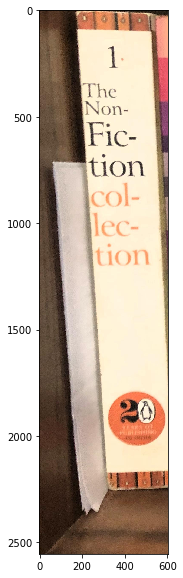

In [3]:
# Read the image
img = cv2.imread("images/books_slices/book_00.jpg")
height, width = img.shape[:2]

print(height,width)

utils.showImage(img)

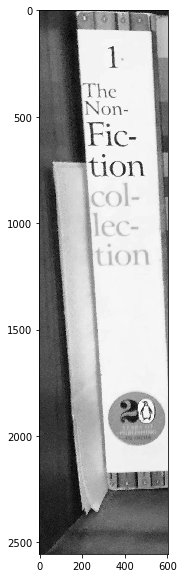

In [4]:
img_c = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
utils.showImageGray(img_c)

# text = ts.image_to_string(img_c)
# print(text)

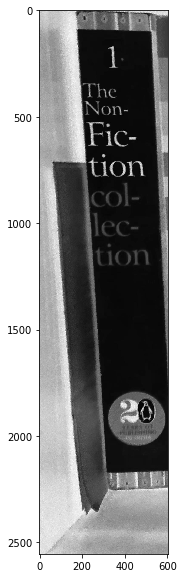

In [5]:
img_c_inv = cv2.bitwise_not(img_c)
utils.showImageGray(img_c_inv)

# text = ts.image_to_string(img_c_inv)
# print(text)

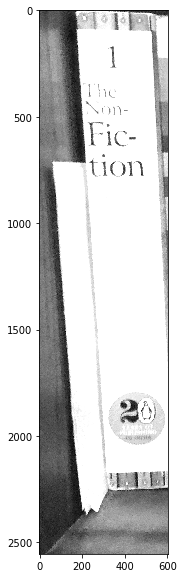

In [6]:
# Increase contrast
img_cnt = np.minimum(img_c * 1.5,255)
utils.showImageGray(img_cnt)

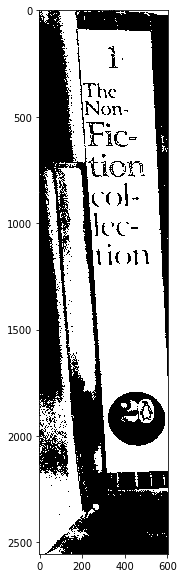

In [7]:
# Threshold : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
ret,img_th1 = cv2.threshold(img_c,200,255,cv2.THRESH_BINARY)
# utils.showImageGray(img_th1)

# Threshold the inverse image
ret,img_th2 = cv2.threshold(cv2.bitwise_not(img_c),200,255,cv2.THRESH_BINARY)
# utils.showImageGray(img_th2)

# Show final image
img_th = img_th1 + img_th2
utils.showImageGray(img_th)

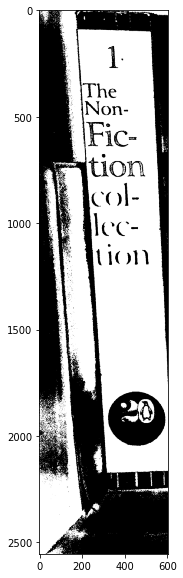

In [9]:
im_blur = cv2.GaussianBlur(img_th,(7,7),0)
utils.showImageGray(im_blur)

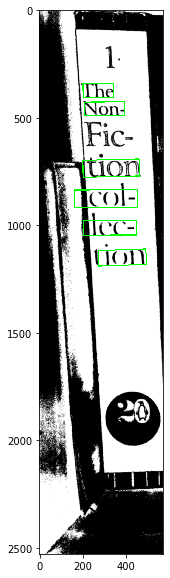

In [10]:
im_blur_t = np.repeat(im_blur[:,:,np.newaxis],repeats=3,axis=2)

frame, framev, boxes, indices = utils.detectText(im_blur_t)
utils.showImage(framev)

In [11]:
text = ts.image_to_string(img_tr)
print(text)

NameError: name 'img_tr' is not defined

2862


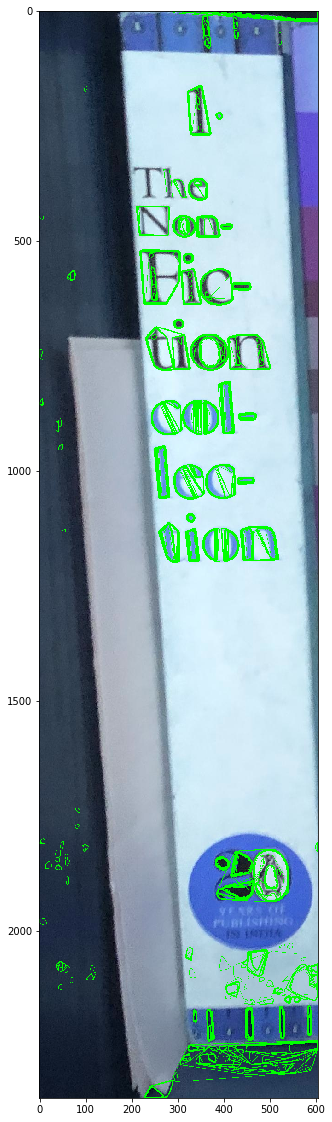

In [109]:
# From: https://github.com/opencv/opencv/blob/master/samples/python/mser.py
mser = cv2.MSER_create()

gray = blur
vis = img.copy()

regions, _ = mser.detectRegions(gray)
print(len(regions))
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis, hulls, 1, (0, 255, 0))

utils.showImageGray(vis,20)

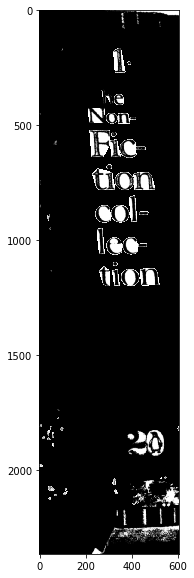

In [110]:
mask = np.zeros((blur.shape[0], blur.shape[1], 1), dtype=np.uint8)

for contour in hulls:
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(blur, blur, mask=mask)

utils.showImageGray(text_only)

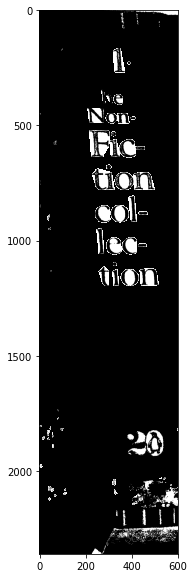

In [111]:
img_tr = utils.trimImage(text_only,100)
utils.showImageGray(img_tr)

In [115]:
text = ts.image_to_string(img_tr)
print(text)